# Создание датасета из чёрно-белых картинок

импорт

In [3]:

import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from imblearn.over_sampling import SMOTE

sys.path.append('../../')

from core.datasets import open_f

скачиваем train_ds и test_ds

In [4]:
train_ds = open_f('smote_data_train_9650', back=2)
test_ds = open_f('repaired_data_test', back=2)

выведем картинки без предобработки и с предобработкой

In [9]:
def draw_ds(ds):
    plt.figure(figsize=(10, 10))
    for i in range(20):
        plt.subplot(4, 5, i + 1)
        img = ds[i]
        plt.imshow(img / 255, cmap=plt.cm.binary)
        plt.axis('off')
    plt.show()

предобработка

In [5]:
train_ds_gray =  np.repeat(np.dot(train_ds['images'], [[0.2989],[0.5870],[0.1140]]), 3, axis=3)
test_ds_gray = np.repeat(np.dot(test_ds['images'], [[0.2989],[0.5870],[0.1140]]), 3, axis=3)

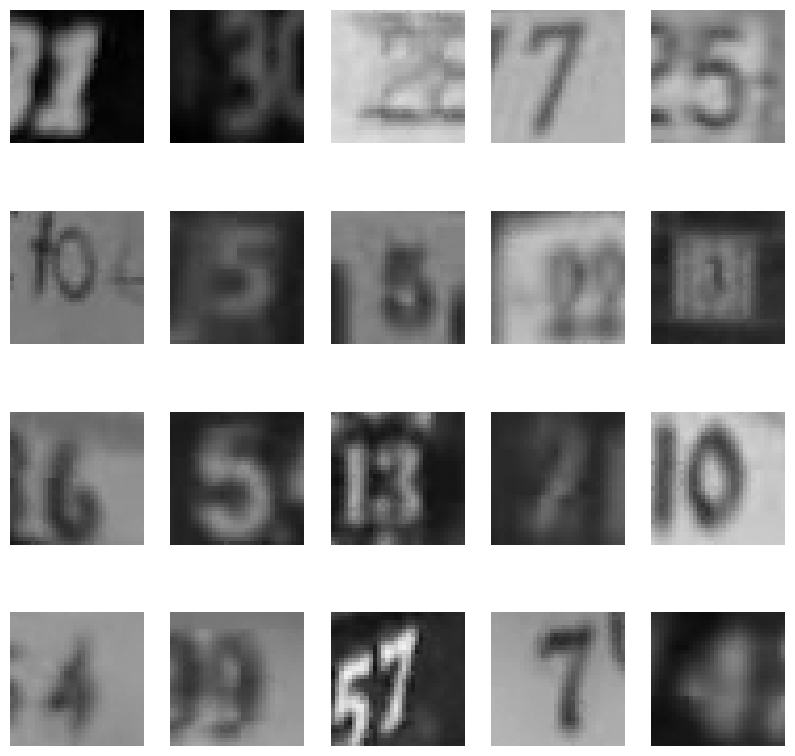

In [31]:
draw_ds(train_ds_gray)

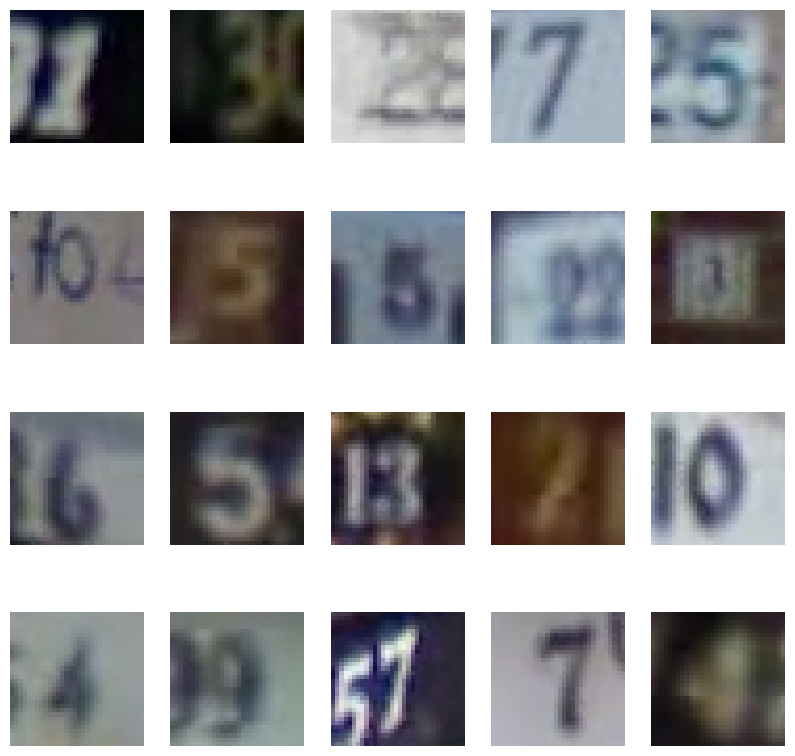

In [11]:
draw_ds(train_ds['images'])

Результат довольно неплохой, можно сохранять

In [6]:
train_ds['images'] = train_ds_gray
test_ds['images'] = test_ds_gray

In [7]:
pickle.dump(train_ds, open('../../data/smote_data_train_9650_gray', 'wb'), protocol=pickle.HIGHEST_PROTOCOL)
pickle.dump(test_ds, open('../../data/repaired_data_test_gray', 'wb'), protocol=pickle.HIGHEST_PROTOCOL)